In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
type(X_train_full)

numpy.ndarray

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[6]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# similar code
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[1].name

'dense'

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7251 - accuracy: 0.7602 - val_loss: 0.5206 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4884 - accuracy: 0.8308 - val_loss: 0.4800 - val_accuracy: 0.8292
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4415 - accuracy: 0.8455 - val_loss: 0.4247 - val_accuracy: 0.8476
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4138 - accuracy: 0.8542 - val_loss: 0.3968 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3931 - accuracy: 0.8616 - val_loss: 0.3837 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3765 - accuracy: 0.8681 - val_loss: 0.3758 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3629 - accuracy: 0.8710 - val_loss: 0.3526 - val_accuracy:

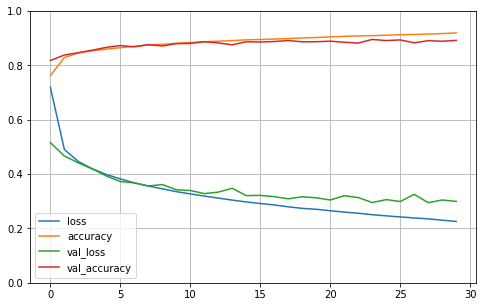

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
weights, biases = model.layers[1].get_weights()
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 77.4972 - accuracy: 0.8314


[77.4971923828125, 0.8313999772071838]

In [ ]:
#predizendo um novo valor
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)

/home/rios/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')